# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# 1. Import Library
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             accuracy_score)

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# 2. Memuat Dataset dari Hasil Clustering
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Bavarage Sales/clustered_data.csv')
print("Preview Data Hasil Clustering:")
print(df.head())
print("\nDistribusi Cluster:")
print(df['Cluster'].value_counts())

Preview Data Hasil Clustering:
   Unit_Price  Total_Price  Quantity  Discount             Category  Cluster
0        1.87       124.54      74.0      0.10               Juices        2
1        1.87        31.98      18.0      0.05          Soft Drinks        0
2       12.04       726.61      71.0      0.15  Alcoholic Beverages        2
3       64.91      5316.13      91.0      0.10  Alcoholic Beverages        3
4        1.64         6.56       4.0      0.00               Juices        0

Distribusi Cluster:
Cluster
0    1885133
2     648932
1     134167
3      31741
Name: count, dtype: int64


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [17]:
# 3. Data Splitting
X = df.drop('Cluster', axis=1)
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nJumlah Data Training: {len(X_train)}")
print(f"Jumlah Data Testing: {len(X_test)}")



Jumlah Data Training: 2159978
Jumlah Data Testing: 539995


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [54]:
# Preprocessing Pipeline
numeric_features = ['Total_Price', 'Discount']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ])

In [55]:
# Model 1: Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])

In [56]:
# Model 2: Logistic Regression
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=1000,
        random_state=42
    ))
])

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [66]:
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n=== Hasil Evaluasi {model_name} ===")
    print(classification_report(y_test, y_pred))
    print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")

    # Confusion Matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d',
                cmap='Blues',
                xticklabels=np.unique(y),
                yticklabels=np.unique(y))
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()



=== Hasil Evaluasi Random Forest ===
              precision    recall  f1-score   support

           0       0.99      0.95      0.97    377027
           1       0.88      0.91      0.90     26833
           2       0.87      0.97      0.92    129787
           3       0.98      0.98      0.98      6348

    accuracy                           0.96    539995
   macro avg       0.93      0.95      0.94    539995
weighted avg       0.96      0.96      0.96    539995

Akurasi: 0.96


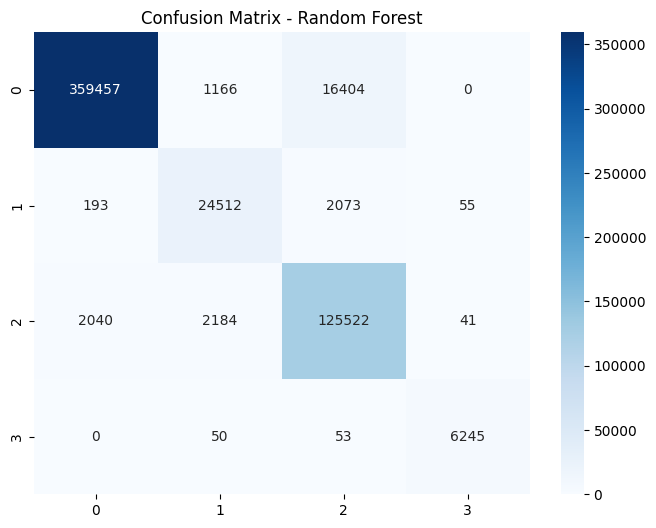

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Hasil Evaluasi Logistic Regression ===
              precision    recall  f1-score   support

           0       0.95      0.98      0.96    377027
           1       0.89      0.73      0.81     26833
           2       0.93      0.87      0.90    129787
           3       0.99      0.99      0.99      6348

    accuracy                           0.94    539995
   macro avg       0.94      0.89      0.91    539995
weighted avg       0.94      0.94      0.94    539995

Akurasi: 0.94


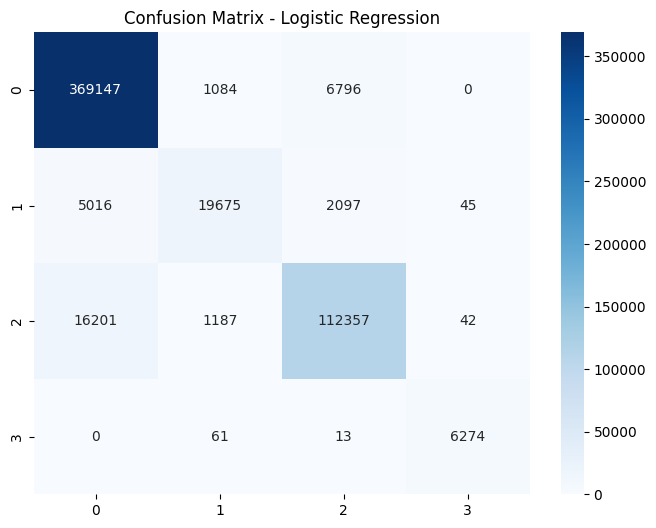

In [58]:
# Evaluasi kedua model
evaluate_model(rf_pipeline, "Random Forest")
evaluate_model(lr_pipeline, "Logistic Regression")

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [71]:
# 2. Hitung y_pred untuk Random Forest
rf_pipeline.fit(X_train, y_train)  # Latih ulang jika perlu
y_pred_rf = rf_pipeline.predict(X_test)

# 3. Hitung y_pred untuk Logistic Regression
lr_pipeline.fit(X_train, y_train)  # Latih ulang jika perlu
y_pred_lr = lr_pipeline.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


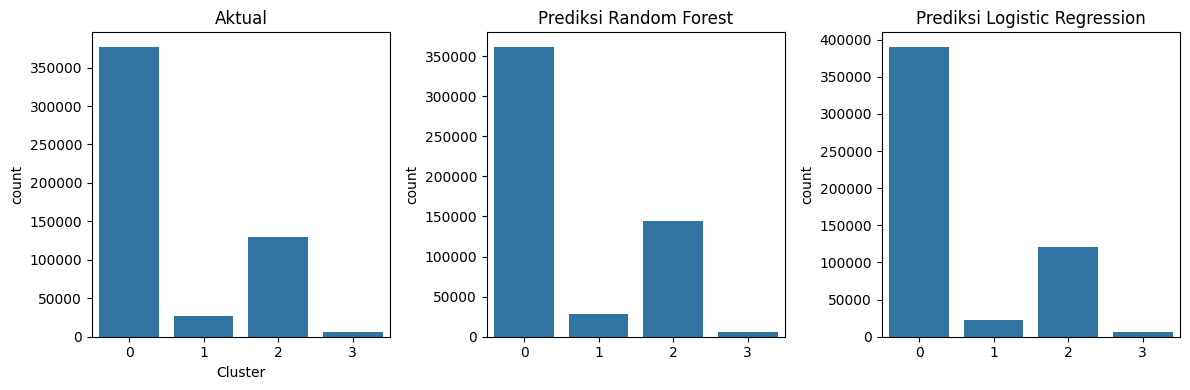

In [83]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.countplot(x=y_test).set_title('Aktual')
plt.subplot(1,3,2)
sns.countplot(x=y_pred_rf).set_title('Prediksi Random Forest')
plt.subplot(1,3,3)
sns.countplot(x=y_pred_lr).set_title('Prediksi Logistic Regression')
plt.tight_layout()
plt.show()

<ipython-input-85-7f0031405c21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


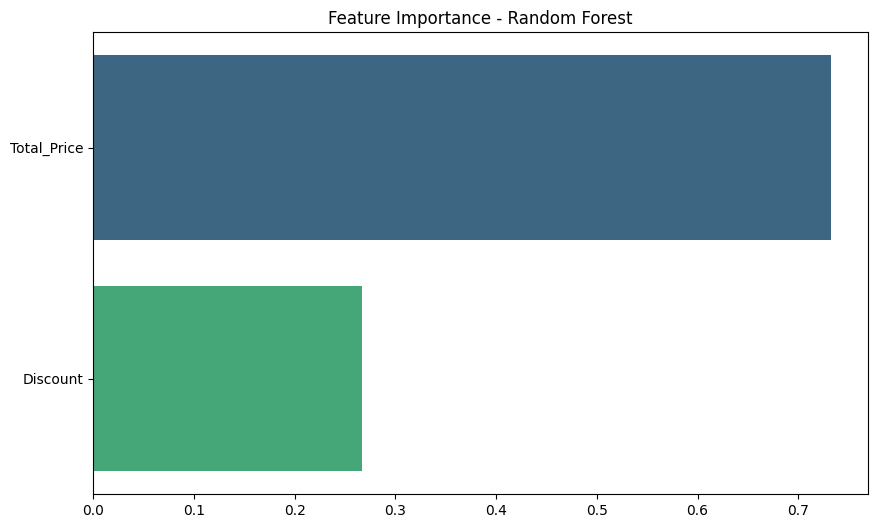

In [85]:
# Feature Importance untuk Random Forest
rf_model = rf_pipeline.named_steps['classifier']
feature_names = numeric_features

plt.figure(figsize=(10,6))
sns.barplot(
    x=rf_model.feature_importances_,
    y=feature_names,
    palette='viridis'
)
plt.title('Feature Importance - Random Forest')
plt.show()

#**Kesimpulan Final**

###**1. Hasil Evaluasi Keseluruhan**

Random Forest menunjukkan performa sedikit lebih unggul dibanding Logistic Regression dengan akurasi 96% berbanding 94%. Kedua model sama-sama mencapai weighted average F1-score yang seimbang dengan nilai 0.96 untuk Random Forest dan 0.94 untuk Logistic Regression, menunjukkan konsistensi prediksi secara keseluruhan. Namun, perbedaan 2% pada dataset sebesar 540 ribu sampel ini bisa dianggap signifikan secara statistik.


###**2. Performa per Cluster**

**Untuk Cluster 0 (Mayoritas):**

* Logistic Regression lebih sensitif (recall 0.98) dibanding Random Forest (recall 0.95), artinya mampu mengidentifikasi lebih banyak true positive dari kelompok ini.
* Random Forest lebih presisi (0.99 vs 0.95), menghasilkan lebih sedikit false positive.

**Untuk Cluster 1 (Minoritas):**

* Random Forest secara signifikan lebih baik dengan recall 0.91 vs 0.73 pada Logistic Regression, menunjukkan kemampuannya 18% lebih baik dalam mendeteksi cluster minoritas ini.
* F1-score Random Forest (0.90) mengungguli Logistic Regression (0.81) untuk cluster ini.

**Untuk Cluster 2:**

* Random Forest kembali unggul dengan recall lebih tinggi (0.97 vs 0.87), meskipun Logistic Regression lebih presisi (0.93 vs 0.87).

**Untuk Cluster 3:**

* Kedua model menunjukkan performa hampir sempurna (F1-score 0.98-0.99), mengindikasikan cluster ini memiliki karakteristik yang sangat mudah dibedakan.

###**3. Analisis Overfitting/Underfitting:**

**Random Forest (Akurasi 96%)**

* Tidak overfitting: Performa stabil di data testing dengan akurasi tinggi (96%) dan precision-recall konsisten di semua cluster.

* Tidak underfitting: Mampu menangkap pola kompleks (recall 91-97% untuk cluster minoritas).


**Logistic Regression (Akurasi 94%)**

* Underfitting: Gagal memodelkan cluster minoritas (recall 73% untuk Cluster 1) karena keterbatasan model linear.

* Tidak overfitting: Akurasi testing realistis tanpa gap signifikan dengan training.


###**4. Tindakan Selanjutnya:**

* Lakukan hiperparameter tuning pada Random Forest.
* Validasi dengan business stakeholder apakah definisi cluster sudah tepat.
* Optimasi Lebih Lanjut:

  * Untuk Random Forest:

   * Batasi max_depth untuk hindari overfitting.

   * Tambah bobot kelas minoritas (class_weight={1:2, 2:1.5}).

  * Untuk Logistic Regression:

   * Gunakan teknik oversampling (SMOTE) untuk Cluster 1.





Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.